# Financial Planning


In [37]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [4]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price
response_btc = requests.get(btc_url).json()
btc_price = response_btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response_eth = requests.get(eth_url).json()
eth_price = response_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")

The current value of your 1.2 BTC is $13,664.54
The current value of your 5.3 ETH is $2,295.69


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Setting Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-09-01", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.43
Current SPY closing price: $352.56


In [11]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $17,628.00
The current value of your 200 AGG shares is $23,686.00


### Savings Health Analysis

In [12]:
# Create savings DataFrame

total_shares_savings = my_btc_value + my_eth_value
total_crypto_savings = my_agg_value + my_spy_value
df_savings = pd.DataFrame({"Amount":[total_shares_savings, total_crypto_savings]},index= ['Crypto','Shares'])
df_savings

,Amount
Crypto,15960.239
Shares,41314.000


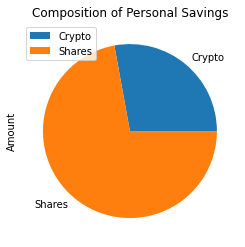

In [38]:
# Plot savings pie chart
pie_chart = df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")
pie_chart.get_figure().savefig("Images/PieChart.png")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_shares_savings + total_crypto_savings
dollars_away = total_savings - emergency_fund
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached a financial goal of enough money in your emergency fund.")
else:
    print(f"You are {dollars_away} from reaching your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2015-09-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-09-01', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

timeframe = "1D"

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-09-01 00:00:00-04:00  108.83  109.11  108.7700  109.01  3083045.0   
2015-09-02 00:00:00-04:00  108.92  109.05  108.8100  108.90  3273302.0   
2015-09-03 00:00:00-04:00  109.06  109.12  108.8701  109.04  1676171.0   
2015-09-04 00:00:00-04:00  109.19  109.33  109.0200  109.28  1529407.0   
2015-09-08 00:00:00-04:00  108.96  109.04  108.9100  109.00  1889306.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-09-01 00:00:00-04:00  193.12  194.77  190.73  191.61  173963880  
2015-09-02 00:00:00-04:00  194.65  195.46  192.42  195.46  120044919  
2015-09-03 00:00:00-04:00  196.26  198.05  194.96  195.55  117191452  
2015-09-04 00:00:00-04:00  192.85  193.86  191.61  192.56  121958169  
2015-09-08 00:00:00-04:00  195.94  197.61  195.17  197.51   92715665

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5
)



In [21]:
# Printing the simulation input data
MC_30_years_sim.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-09-01 00:00:00-04:00  108.83  109.11  108.7700  109.01  3083045.0   
2015-09-02 00:00:00-04:00  108.92  109.05  108.8100  108.90  3273302.0   
2015-09-03 00:00:00-04:00  109.06  109.12  108.8701  109.04  1676171.0   
2015-09-04 00:00:00-04:00  109.19  109.33  109.0200  109.28  1529407.0   
2015-09-08 00:00:00-04:00  108.96  109.04  108.9100  109.00  1889306.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-09-01 00:00:00-04:00          NaN  193.12  194.77  190.73  191.61   
2015-09-02 00:00:00-04:00    -0.001009  194.65  195.46  192.42  195.46   
2015-09-03 00:00:00-04:00     0.001286  196.26  198.05  194.96  195.55   
2015-09-04 00:00:00-04:00     0.002201  192.85  193.86  191.61  192.56   
2015-09-08 00:00:00-04:00    -0.002562  195.94  197.61  195.17  197.51   

                                                   
                              volume daily_return  
2015-09-01 00:00:00-04:00  173963880          NaN  
2015-09-02 00:00:00-04:00  120044919     0.020093  
2015-09-03 00:00:00-04:00  117191452     0.000460  
2015-09-04 00:00:00-04:00  121958169    -0.015290  
2015-09-08 00:00:00-04:00   92715665     0.025706

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003824,0.996163,1.005442,1.005460,1.006839,0.999496,0.992314,0.998150,1.001945,0.994814,...,1.003443,1.001524,0.992110,0.992716,1.008196,0.992941,1.001787,1.000026,1.004770,0.998918
2,1.003561,0.993683,1.001688,1.001026,1.005644,1.005809,0.994883,1.001647,1.004332,0.998758,...,1.002281,1.003939,0.987447,0.999993,1.006490,0.998207,0.999264,1.005325,0.999167,0.990105
3,1.006521,0.993767,1.002398,1.010050,1.006908,1.005628,1.002917,1.002717,1.005077,1.001372,...,1.006393,1.002741,0.994164,1.002931,1.000531,0.993757,0.991920,0.999016,1.001713,0.976871
4,1.008760,0.992382,0.994349,1.009148,0.999902,1.010706,0.994614,0.998048,1.008105,1.007225,...,1.005510,1.003323,0.997401,0.996071,1.006063,0.988205,0.979473,1.001622,1.002663,0.975800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.662302,1.254938,1.234148,1.181620,0.989183,1.619636,1.617040,2.239478,1.618815,1.367871,...,1.394770,1.334749,1.191358,1.817328,1.339666,1.649926,1.802185,1.314307,1.287745,1.459144
1257,1.662487,1.254609,1.217479,1.186728,0.977731,1.617913,1.608044,2.224570,1.619333,1.366457,...,1.392338,1.341242,1.199284,1.821203,1.347748,1.650568,1.802453,1.311640,1.281581,1.464476
1258,1.673560,1.245698,1.220406,1.194446,0.979878,1.612727,1.605081,2.248035,1.633073,1.357083,...,1.387520,1.335939,1.204333,1.799262,1.350821,1.665069,1.792193,1.308384,1.279040,1.458215
1259,1.680134,1.250276,1.230266,1.185643,0.974729,1.619316,1.600931,2.240919,1.623762,1.354330,...,1.395710,1.334192,1.209475,1.807406,1.347563,1.658544,1.788351,1.314238,1.261929,1.468024


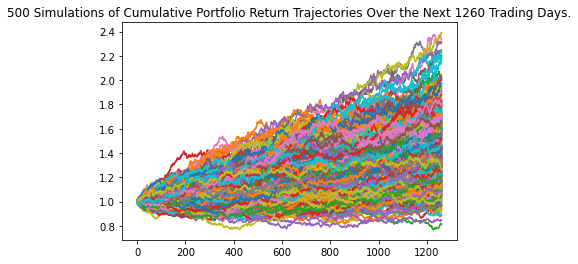

In [26]:
# Plot simulation outcomes
line_plot = MC_30_years_sim.plot_simulation()

line_plot.get_figure().savefig("Images/MC_fiveyear_sim_plot.png", bbox_inches='tight')

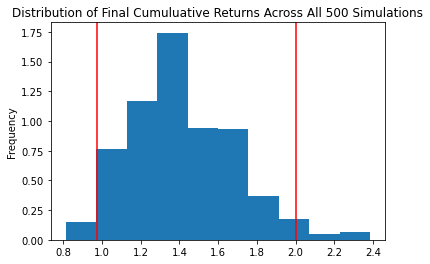

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_years_sim.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('Images/MC_30year_dist_plot.png',bbox_inches='tight')

## Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30_years_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.412745
std               0.270769
min               0.812653
25%               1.216409
50%               1.372442
75%               1.598756
max               2.384962
95% CI Lower      0.972348
95% CI Upper      2.003440
Name: 1260, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.0f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $19,446.96 and $40,068.81


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [34]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.0f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 30 years will end within in the range of $29,170.44 and $60,103.21
